In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np 

In [5]:
#This data is a time series of advance retail sales: NonRetail Sales
nonretail = pd.read_csv('C:/Users/rishp/Downloads/TSA/RSNSR.csv',parse_dates=["date"],index_col="date")
nonretail = nonretail.drop(["realtime_start","realtime_end"],axis=1)
nonretail.head()

,value
date,
1992-01-01,6515
1992-02-01,6110
1992-03-01,6018
1992-04-01,6327
1992-05-01,6550


In [6]:
nonretail.describe()

,value
count,334.000000
mean,25169.038922
std,15585.932812
min,6018.000000
25%,11615.000000
50%,22517.500000
75%,35163.750000
max,67912.000000


In [7]:
nonretail.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [8]:
nonretail.tail()

,value
date,
2019-06-01,65370
2019-07-01,66275
2019-08-01,67190
2019-09-01,67296
2019-10-01,67912


In [9]:
# We can see that data is present from January 1992 to October 2019. Also the value is in million dollars of retail sales

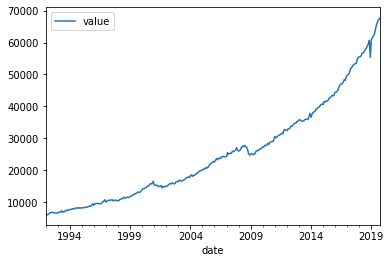

In [10]:
nonretail.plot()
plt.show()

In [11]:
#We have to check the stationarity of this dataset therefore we call the Augmented Dicky Fuller Test on the data
from statsmodels.tsa.stattools import adfuller

adf_stat = adfuller(nonretail['value'])
print(adf_stat)

(4.329975513852195, 1.0, 13, 320, {'1%': -3.450951662384033, '5%': -2.8706147570800784, '10%': -2.571604931640625}, 4828.036514196693)


First element of the tuple is the test statistic which is 4.329, therefore the data is not stationary

Second element of the tuple is p-value of the test-statistic which is 1.0 Since it is very high, we cannot reject the null hypothesis (non-stationary)

Fifth element is a dictionary. To get a p-value of 0.01 we need a test statistic of -3.45

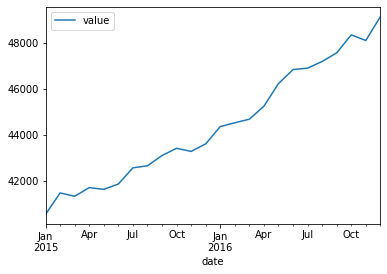

In [13]:
nonretail["2015":"2016"].plot()
plt.show()

In [14]:
# We have to make the data stationary therefore we have to use the percent change in order to get a stationary value

In [15]:
nonretail_yoy = nonretail.pct_change(12).dropna()
nonretail_yoy.head(5)

,value
date,
1993-01-01,0.019800
1993-02-01,0.109656
1993-03-01,0.164673
1993-04-01,0.085507
1993-05-01,0.115878


<AxesSubplot:xlabel='date'>

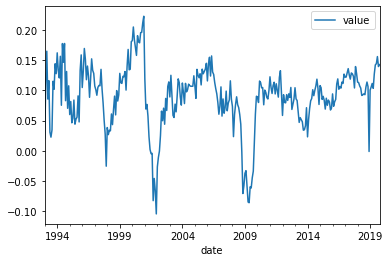

In [16]:
nonretail_yoy.plot()

In [17]:
print(adfuller(nonretail_yoy['value']))


(-3.539386161543893, 0.007031349115726733, 13, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -1426.7503577647408)


In [18]:
#The p-value is down to 0.007 after transforming the data. Let's try differenencing on these values to check the p-value

<AxesSubplot:xlabel='date'>

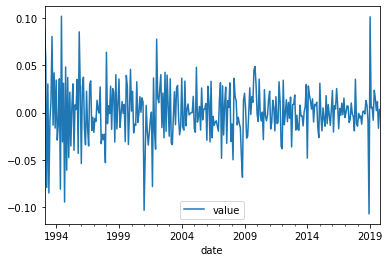

In [19]:
nonretail_yoy2 = nonretail_yoy.diff().dropna()
nonretail_yoy2.plot()

In [20]:
print(adfuller(nonretail_yoy2['value']))


(-7.43803590325631, 6.10942145129203e-11, 13, 307, {'1%': -3.4518314994261337, '5%': -2.8710009653519166, '10%': -2.571810878948318}, -1413.0989660847163)


In [ ]:
#The p value here is close to 0. This data is now ready to build ARMA Models in order to model our data.